#Hands on Neural Network Project: Md Mamunur Rahman Moon



**Project 1: Fashion Dataset Sorting (Classification)**

Import TensorFlow and Keras.

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


Let's start by loading the fashion MNIST dataset.The dataset is already comes with a split between a training set and a test set, but it can be useful to split the training set further to have a validation set:

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 4us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 24s 1us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 4s 1us/step


In [3]:
assert X_train_full.shape == (60000, 28, 28)
assert X_test.shape == (10000, 28, 28)
assert y_train_full.shape == (60000,)
assert y_test.shape == (10000,)

The training set contains 60,000 grayscale images, each 28x28 pixels:

In [4]:
X_train_full.shape

(60000, 28, 28)

Each pixel intensity is represented as a byte (0 to 255):

In [5]:
X_train_full.dtype

dtype('uint8')

0 to 255 range would be cause of gradient explode becasue **weight matrix** could get very large for 255

Let's split the full training set into a validation set and a (smaller) training set. We also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255.

In [6]:
# Create Validation (X) set contaning First 5000 data from the full training set
# And, convert data into 0 to 1 range and make it float for the ease of calculation
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.

# Create Validation (y) set contaning First 5000 data from the full training set
# No need to scale the range, because y label is already in 0-9 range
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# Make it float for the ease of calculation
X_test = X_test / 255.

In [7]:
len(X_valid)

5000

You can plot an image using Matplotlib's `imshow()` function, with a `'binary'`
 color map:

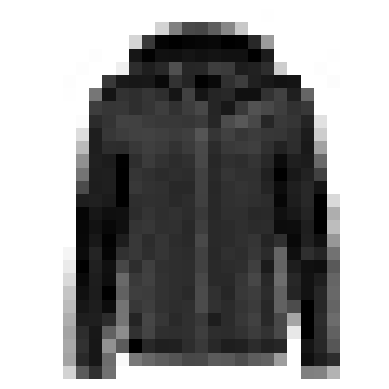

In [8]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

The labels are the class IDs (represented as uint8), from 0 to 9:

In [9]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [10]:
len(y_train)

55000

In [11]:
y_train[0]

4

Here are the corresponding class names:

In [12]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

So the first image in the training set is a coat:

In [13]:
class_names[y_train[0]]

'Coat'

The validation set contains 5,000 images, and the test set contains 10,000 images:

In [14]:
X_valid.shape

(5000, 28, 28)

In [15]:
y_valid.shape

(5000,)

In [16]:
X_test.shape

(10000, 28, 28)

In [17]:
y_test.shape

(10000,)

Let's take a look at a sample of the images in the dataset:

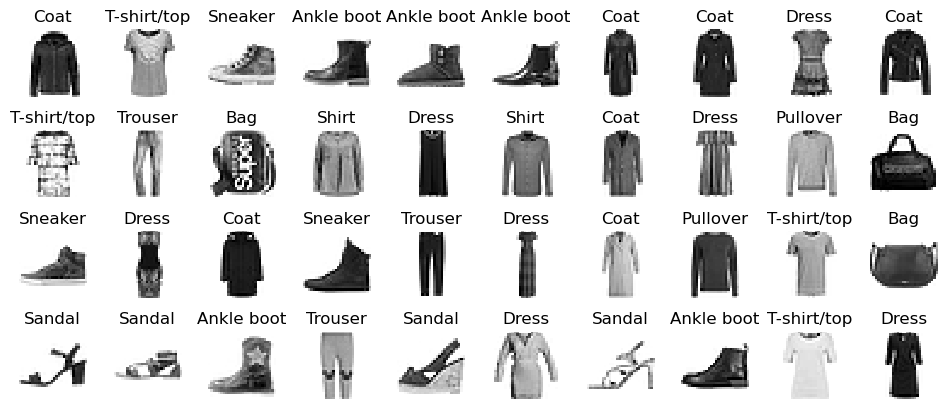

In [18]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## Build the network

In [67]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout

In [72]:
model = keras.models.Sequential()

# Flatten or Convert into array of 28 x 28 = 784 values to work with images
model.add(keras.layers.Flatten(input_shape=[28, 28])) #Input Layer

# 1st Hidden layer with Activation ReLU (300 neurons)
model.add(keras.layers.Dense(300, activation="relu"))

# 1st Dropout Layer
model.add(keras.layers.Dropout(0.2))

# 2nd Hidden layer with Activation ReLU (100 neurons)
model.add(keras.layers.Dense(100, activation="relu", kernel_regularizer=l2(0.01)))

# Dropout Layer
model.add(keras.layers.Dropout(0.2))

# Output Layer with Softmax as we are doing Multi-class classification
model.add(keras.layers.Dense(10, activation="softmax"))

In [73]:
# Setting a seed to get persistent random initial weights, otherwise we would get different initial weights each time we run
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [74]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dropout name=dropout, built=True>,
 <Dense name=dense_1, built=True>,
 <Dropout name=dropout_1, built=True>,
 <Dense name=dense_2, built=True>]

In [75]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [76]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [77]:
inputs = model.layers[0]
inputs.name

'flatten'

In [78]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [79]:
model.get_layer(hidden1.name) is hidden1

True

In [80]:
weights, biases = hidden1.get_weights()

In [81]:
weights

array([[-0.06531266, -0.04431232,  0.02258001, ...,  0.04001205,
         0.01489443,  0.02677763],
       [ 0.05545892, -0.0734079 , -0.05504191, ...,  0.05961484,
        -0.04995858,  0.07338029],
       [-0.04409102,  0.06662211, -0.01121598, ...,  0.05508335,
         0.02742792,  0.07192323],
       ...,
       [ 0.01807074, -0.07302091, -0.03354862, ...,  0.03141567,
         0.01152764, -0.00294129],
       [-0.04411952, -0.04397003,  0.07270333, ..., -0.04312163,
         0.06217533,  0.00343341],
       [ 0.01076548,  0.04646394, -0.04522206, ..., -0.0551276 ,
        -0.02628936, -0.03188874]], dtype=float32)

In [82]:
weights.shape

(784, 300)

In [83]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [84]:
biases.shape

(300,)

In [85]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

This is equivalent to:

```python
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])
```

In [86]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7395 - loss: 1.1431 - val_accuracy: 0.8576 - val_loss: 0.4549
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8407 - loss: 0.4971 - val_accuracy: 0.8656 - val_loss: 0.4232
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8556 - loss: 0.4540 - val_accuracy: 0.8692 - val_loss: 0.4111
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8612 - loss: 0.4287 - val_accuracy: 0.8784 - val_loss: 0.3855
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8677 - loss: 0.4103 - val_accuracy: 0.8856 - val_loss: 0.3724
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8725 - loss: 0.3992 - val_accuracy: 0.8810 - val_loss: 0.3794
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 22s 10ms/step - accuracy: 0.8762 - loss: 0.3864 - val_accuracy: 0.8868 - val_loss: 0.3675
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.8798 - loss: 0.378

In [ ]:
# save model
model.save("fashion_mnist_model_2.h5")

In [47]:
# load model
from tensorflow.keras.models import load_model
model = load_model("fashion_mnist_model_adam.h5")

In [49]:
history.params

{'verbose': 'auto', 'epochs': 30, 'steps': 1719}

In [50]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [51]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

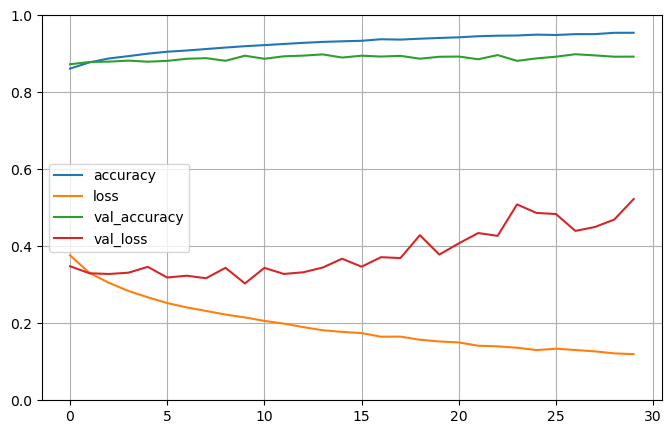

In [52]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [53]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8791 - loss: 0.5663


[0.5737802386283875, 0.8792999982833862]

##TESTING

This dataset has a **test set of 10,000 images**

In [54]:
X_new = X_test[:3]

**This is how the test data looks like**

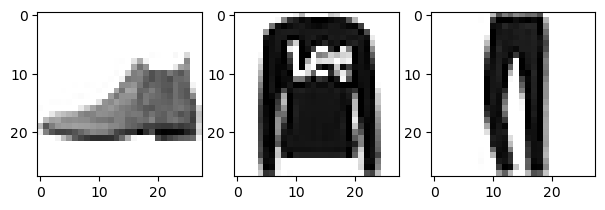

In [55]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

**Let's see what our neural network predicts**

In [56]:
#y_pred = model.predict_classes(X_new) # deprecated
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


array([9, 2, 1], dtype=int64)

In [57]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [58]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

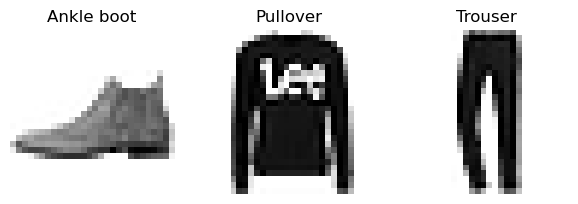

In [59]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## Deployment

In [60]:
# model.save('fashion.h5')  # Saves as an HDF5 file


In [63]:
model = tf.keras.models.load_model('fashion_mnist_model_adam.h5')

In [64]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8791 - loss: 0.5663


[0.5737802386283875, 0.8792999982833862]

In [1]:
! pip install streamlit -q pillow

In [ ]:
# !wget -q -O - ipv4.icanhazip.com

34.16.185.148


In [ ]:
# ! streamlit run app.py & npx localtunnel --port 8501



⠙⠹⠸
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.16.185.148:8501

⠼⠴⠦your url is: https://khaki-readers-study.loca.lt
34.16.185.148
34.16.185.148
2025-03-27 00:51:02.795028: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743036662.847662   83244 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743036662.863995   83244 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-27 00:51:08.615936: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (3